In [1]:
import pandas as pd

In [5]:
df=pd.read_excel('clinical-study-ae-taskB.xlsx')
df

,participant_id,age,sex,weight,height,treatment_group,response,protein_concentration,ae
0,SUBJ_001,46,Female,84.66,1.59,DRUG,N,148.0,Y
1,SUBJ_002,47,Female,71.21,1.64,DRUG,Y,85.0,N
2,SUBJ_003,48,Female,69.85,1.73,CONTROL,N,183.0,N
3,SUBJ_004,59,Female,62.94,1.50,DRUG,Y,89.0,N
4,SUBJ_005,59,Female,113.91,1.63,CONTROL,N,137.0,N
...,...,...,...,...,...,...,...,...,...
763,SUBJ_764,61,Female,82.95,1.59,CONTROL,Y,101.0,N
764,SUBJ_765,65,Male,112.86,1.76,DRUG,N,122.0,N
765,SUBJ_766,60,Male,81.03,1.77,DRUG,N,121.0,N
766,SUBJ_767,53,Male,88.67,1.72,DRUG,Y,126.0,N


In [20]:
# Sum of duplicates
print('Sum of duplicates:',df.duplicated().sum())
print("Sum of null values:", df.isnull().sum().sum())

Sum of duplicates: 0
Sum of null values: 0


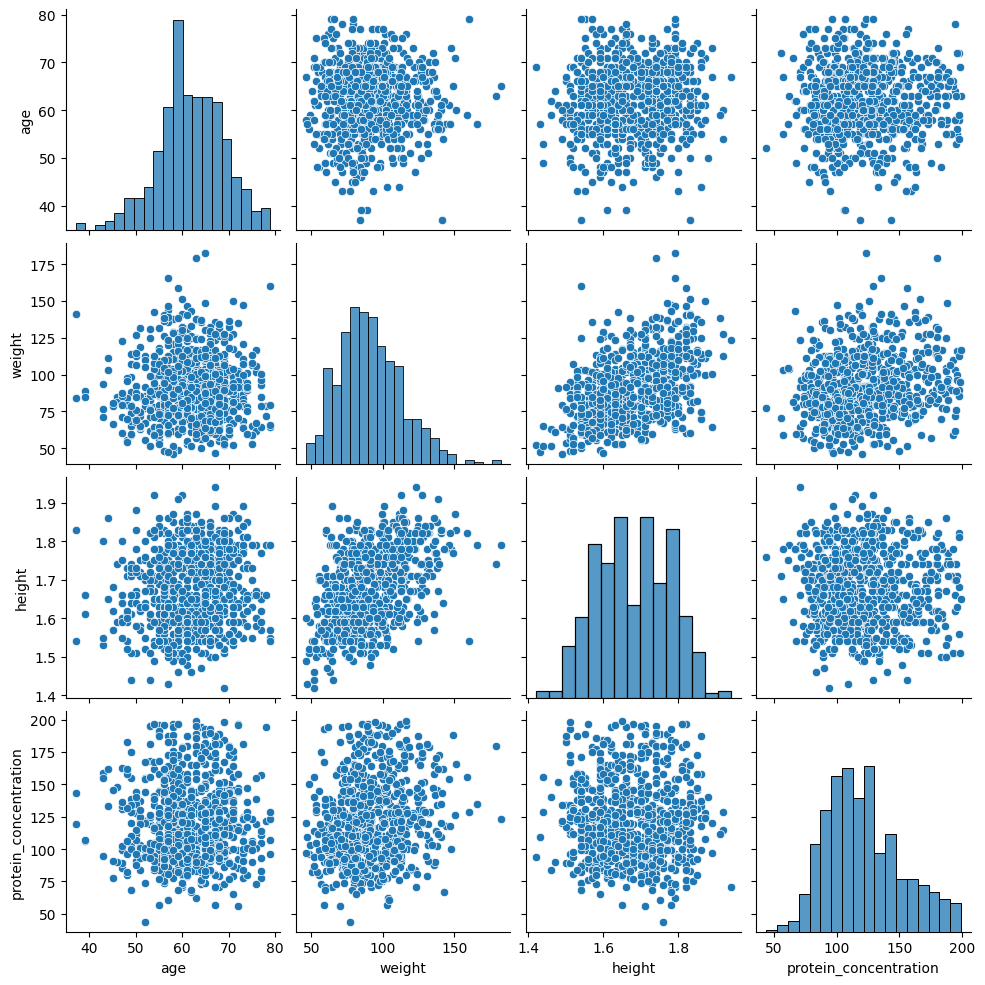

In [23]:
import seaborn as sns

sns.pairplot(df)

In [25]:
df.insert(8, 'response', df.pop('response'))

In [26]:
df

,participant_id,age,sex,weight,height,treatment_group,protein_concentration,ae,response
0,SUBJ_001,46,Female,84.66,1.59,DRUG,148.0,Y,N
1,SUBJ_002,47,Female,71.21,1.64,DRUG,85.0,N,Y
2,SUBJ_003,48,Female,69.85,1.73,CONTROL,183.0,N,N
3,SUBJ_004,59,Female,62.94,1.50,DRUG,89.0,N,Y
4,SUBJ_005,59,Female,113.91,1.63,CONTROL,137.0,N,N
...,...,...,...,...,...,...,...,...,...
763,SUBJ_764,61,Female,82.95,1.59,CONTROL,101.0,N,Y
764,SUBJ_765,65,Male,112.86,1.76,DRUG,122.0,N,N
765,SUBJ_766,60,Male,81.03,1.77,DRUG,121.0,N,N
766,SUBJ_767,53,Male,88.67,1.72,DRUG,126.0,N,Y


In [27]:
X=df[['age','sex','weight','height','treatment_group','protein_concentration','ae']]
y=df[['response']]

In [30]:
X

,age,sex,weight,height,treatment_group,protein_concentration,ae
0,46,Female,84.66,1.59,DRUG,148.0,Y
1,47,Female,71.21,1.64,DRUG,85.0,N
2,48,Female,69.85,1.73,CONTROL,183.0,N
3,59,Female,62.94,1.50,DRUG,89.0,N
4,59,Female,113.91,1.63,CONTROL,137.0,N
...,...,...,...,...,...,...,...
763,61,Female,82.95,1.59,CONTROL,101.0,N
764,65,Male,112.86,1.76,DRUG,122.0,N
765,60,Male,81.03,1.77,DRUG,121.0,N
766,53,Male,88.67,1.72,DRUG,126.0,N


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_features = ['age', 'weight', 'height','protein_concentration']
numerical_transformer = StandardScaler()

In [36]:
categorical_features = ['sex', 'treatment_group']
categorical_transformer = OneHotEncoder(drop='first')

In [38]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [40]:
model.fit(X_train, y_train)

C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'weight', 'height',
                                                   'protein_concentration']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex',
                                                   'treatment_group'])])),
                ('classifier', RandomForestClassifier())])

In [41]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7792207792207793


In [44]:
import pickle

In [45]:
pickle.dump(model,open('model1.pkl','wb'))